In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# 1. DataSet1

In [36]:
std = pd.read_csv('24pos2.csv', index_col = None, header = None)

std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

std.head(10)

time = std[0].values

Text(0,0.5,u'acceleration (m/s^2)')

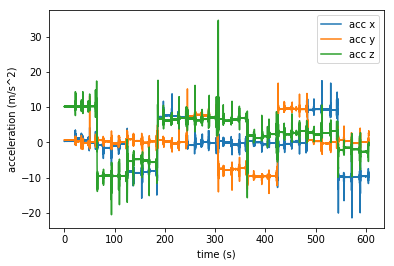

In [37]:
## Acceleration
std_acc = std[std[1]==' ACC_UN']

acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

acc_t = std_acc[0].values

plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


Text(0,0.5,u'angular velocity (rad/s)')

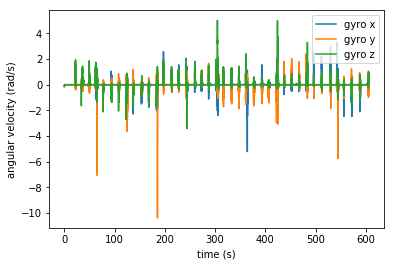

In [38]:
## Gyroscope
std_gyro = std[std[1]==' GYRO_UN']

gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

gyro_t = std_gyro[0].values

plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [39]:
## Stability Detection
g = np.sqrt(acc_x[14]**2 + acc_y[14]**2 + acc_z[14]**2)
g

10.175620462532208

In [40]:
w_min = 0.3
w_max = 1.1

In [41]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [42]:
std_static  = np.zeros(len(acc_t))

In [43]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 0.2 and std_gyro[i] < 0.1:
            std_static[i] = 1
            
    ##############
        i = i + 1

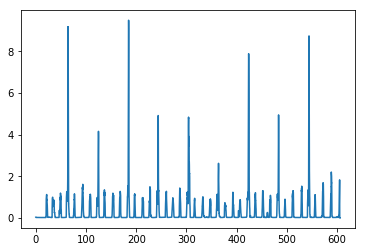

In [44]:
plt.plot(acc_t,std_acc)

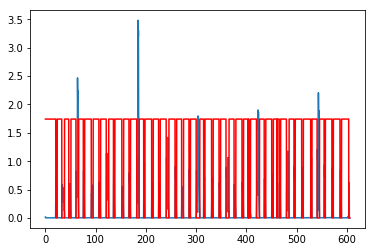

In [45]:
plt.plot(acc_t,std_gyro)
plt.plot(acc_t,0.5*std_static*np.max(std_gyro),'r')

Text(0.5,1,u'Detection on Acceleration')

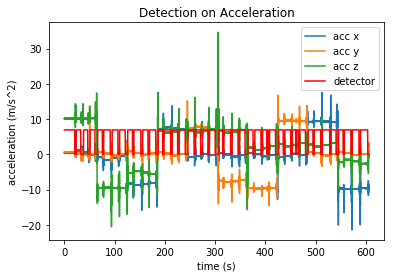

In [46]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,0.2*std_static*np.max(acc_z),'r')
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')


Text(0,0.5,u'angular velocity (rad/s)')

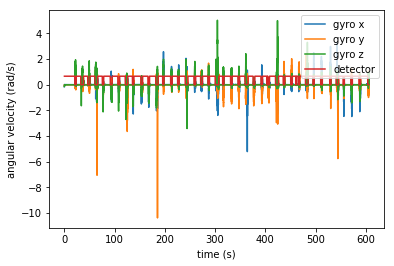

In [47]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,0.2*std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [48]:
windows = []

In [49]:
start = 0

In [50]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)



In [51]:
resT = np.zeros((len(windows)/2,2))

In [52]:
for i in range(len(resT)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resT[i,0] = gyro_t[windows[2*i]]
    resT[i,1] = gyro_t[windows[2*i+1]]

sio.savemat('24Tpos1.mat', {'resT':resT})
sio.savemat('24gTpos1.mat', {'resgT':gyro_t})

In [53]:
res = np.zeros((len(windows)/2,3))

In [54]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])


In [55]:
res

array([[ 3.12650457e-01,  6.07279930e-01,  1.01983140e+01],
       [ 1.05008852e+00,  2.73565562e-01,  1.01389241e+01],
       [ 5.58005150e-01, -2.42301063e-01,  1.01915379e+01],
       [-2.51600402e-02,  7.61160352e-02,  1.02225563e+01],
       [-8.11502864e-01,  6.09436265e-01, -9.51942380e+00],
       [-1.55283333e+00,  2.61058109e-01, -9.46407323e+00],
       [-1.02468036e+00, -3.23954038e-01, -9.51539468e+00],
       [-4.65507624e-01,  4.38044955e-02, -9.54991881e+00],
       [-8.27415385e+00,  8.37418254e-01, -5.35958495e+00],
       [-8.65542280e+00,  4.40337759e-01, -4.81549033e+00],
       [-8.42377601e+00, -9.83847922e-02, -5.19779948e+00],
       [-8.10368478e+00,  2.69890320e-01, -5.65311828e+00],
       [ 7.25687716e+00,  6.00131414e-01,  6.69829093e+00],
       [ 7.64897984e+00,  2.11281454e-01,  6.22922342e+00],
       [ 7.42284528e+00, -3.39050101e-01,  6.51435812e+00],
       [ 7.04597582e+00,  2.83316100e-02,  6.97043949e+00],
       [-8.17780187e-01,  7.43475861e+00

In [56]:
resGyro = np.zeros((len(windows)/2,3))

In [57]:
for i in range(len(resGyro)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resGyro[i,0] = np.mean(gyro_x[windows[2*i]:windows[2*i+1]])
    resGyro[i,1] = np.mean(gyro_y[windows[2*i]:windows[2*i+1]])
    resGyro[i,2] = np.mean(gyro_z[windows[2*i]:windows[2*i+1]])


In [58]:
resGyro

array([[ 0.00710682, -0.00632311, -0.00929821],
       [ 0.00730775, -0.00673151, -0.00943374],
       [ 0.00678427, -0.00645263, -0.00274978],
       [ 0.00709187, -0.00631911, -0.00920129],
       [ 0.00703158, -0.00674246, -0.00906105],
       [ 0.00708422, -0.0070954 , -0.00928079],
       [ 0.00731351, -0.00682036, -0.00934903],
       [ 0.00706718, -0.0067256 , -0.00931742],
       [ 0.00708695, -0.00373432, -0.00888502],
       [ 0.00711317, -0.00715046, -0.00914232],
       [ 0.00721024, -0.00670458, -0.009279  ],
       [ 0.00708023, -0.00653312, -0.00924026],
       [ 0.00716342, -0.00639986, -0.00934893],
       [ 0.00701621, -0.00648732, -0.0093688 ],
       [ 0.00702489, -0.00653327, -0.00946458],
       [ 0.00716922, -0.00642445, -0.00952034],
       [ 0.00703337, -0.0063144 , -0.00932971],
       [ 0.00743542, -0.00632677, -0.00934634],
       [ 0.00722365, -0.00635754, -0.00931913],
       [ 0.00708503, -0.00632968, -0.00939368],
       [ 0.00794687, -0.00653887, -0.010

In [59]:
import scipy.io as sio
sio.savemat('24Winpos1.mat', {'windows':windows})
sio.savemat('24Stpos1.mat',  {'res':res})
sio.savemat('24Gyrpos1.mat', {'resGyro':resGyro})

# 1. DataSet2

In [60]:
std = pd.read_csv('24pos3.csv', index_col = None, header = None)

std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

std.head(10)

time = std[0].values

Text(0,0.5,u'acceleration (m/s^2)')

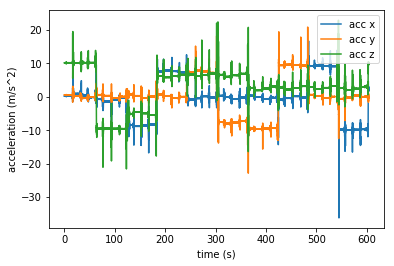

In [61]:
## Acceleration
std_acc = std[std[1]==' ACC_UN']

acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

acc_t = std_acc[0].values

plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


Text(0,0.5,u'angular velocity (rad/s)')

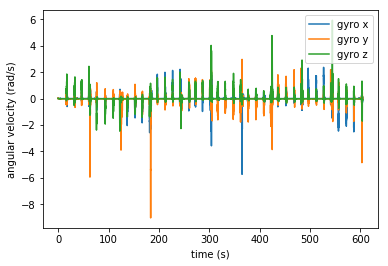

In [62]:
## Gyroscope
std_gyro = std[std[1]==' GYRO_UN']

gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

gyro_t = std_gyro[0].values

plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [63]:
## Stability Detection
g = np.sqrt(acc_x[14]**2 + acc_y[14]**2 + acc_z[14]**2)
g

10.177677712883156

In [64]:
w_min = 0.3
w_max = 1.1

In [65]:
sig_acc = g
sig_gyro = 0 + 0.3

In [66]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))


In [67]:
std_static  = np.zeros(len(acc_t))

In [68]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 0.2 and std_gyro[i] < 0.1:
            std_static[i] = 1
            
    ##############
        i = i + 1

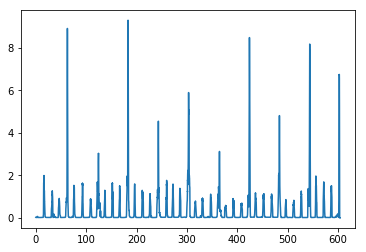

In [69]:
plt.plot(acc_t,std_acc)

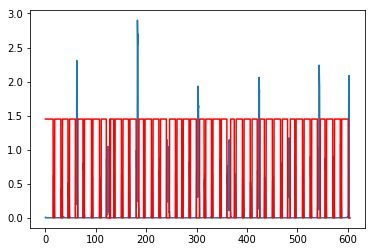

In [70]:
plt.plot(acc_t,std_gyro)
plt.plot(acc_t,0.5*std_static*np.max(std_gyro),'r')

Text(0.5,1,u'Detection on Acceleration')

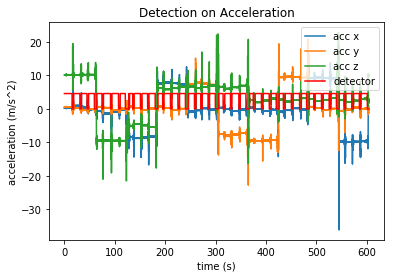

In [71]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,0.2*std_static*np.max(acc_z),'r')
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')


Text(0,0.5,u'angular velocity (rad/s)')

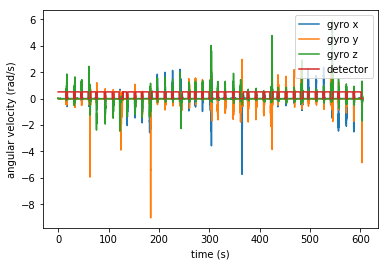

In [72]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,0.2*std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [73]:
windows = []

In [74]:
start = 0

In [75]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)



In [85]:
resT = np.zeros((len(windows)/2,3))

In [86]:
for i in range(len(windows)/2):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resT[i,0] = gyro_t[windows[2*i]]
    resT[i,1] = gyro_t[windows[2*i+1]]

sio.savemat('24Tpos2.mat', {'resT':resT})
sio.savemat('24gTpos2.mat', {'resgT':gyro_t})

In [88]:
res = np.zeros((len(windows)/2,3))

In [89]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])


In [90]:
resGyro = np.zeros((len(windows)/2,3))

In [91]:
for i in range(len(resGyro)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resGyro[i,0] = np.mean(gyro_x[windows[2*i]:windows[2*i+1]])
    resGyro[i,1] = np.mean(gyro_y[windows[2*i]:windows[2*i+1]])
    resGyro[i,2] = np.mean(gyro_z[windows[2*i]:windows[2*i+1]])


In [92]:
import scipy.io as sio
sio.savemat('24Winpos2.mat', {'windows':windows})
sio.savemat('24Stpos2.mat',  {'res':res})
sio.savemat('24Gyrpos2.mat', {'resGyro':resGyro})

# 1. DataSet3

In [93]:
std = pd.read_csv('24pos6.csv', index_col = None, header = None)

std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

std.head(10)

time = std[0].values

Text(0,0.5,u'acceleration (m/s^2)')

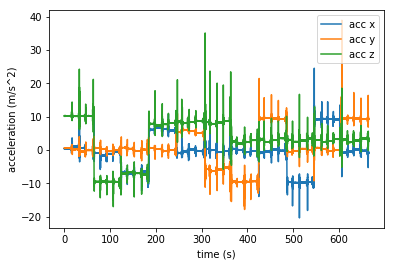

In [94]:
## Acceleration
std_acc = std[std[1]==' ACC_UN']

acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

acc_t = std_acc[0].values

plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


Text(0,0.5,u'angular velocity (rad/s)')

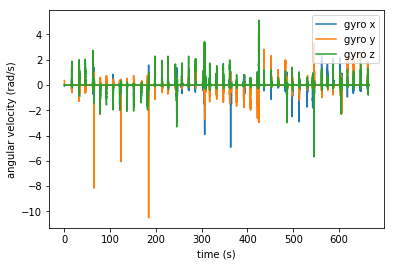

In [95]:
## Gyroscope
std_gyro = std[std[1]==' GYRO_UN']

gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

gyro_t = std_gyro[0].values

plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [96]:
#w_min = 0.3
w_max = 1.1

In [97]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [98]:
std_static  = np.zeros(len(acc_t))

In [99]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 0.2 and std_gyro[i] < 0.1:
            std_static[i] = 1
            
    ##############
        i = i + 1

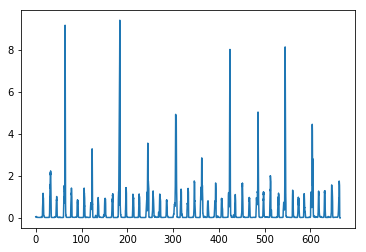

In [100]:
plt.plot(acc_t,std_acc)

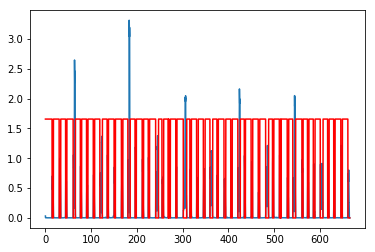

In [101]:
plt.plot(acc_t,std_gyro)
plt.plot(acc_t,0.5*std_static*np.max(std_gyro),'r')

Text(0.5,1,u'Detection on Acceleration')

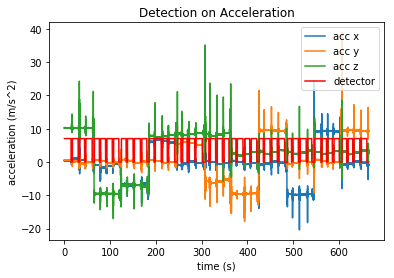

In [102]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,0.2*std_static*np.max(acc_z),'r')
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')


Text(0,0.5,u'angular velocity (rad/s)')

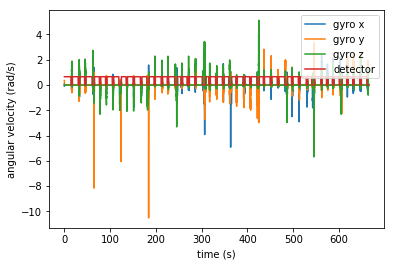

In [103]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,0.2*std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [104]:
windows = []

In [105]:
start = 0

In [106]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)



In [107]:
resT = np.zeros((len(windows)/2,3))

In [108]:
for i in range(len(resT)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resT[i,0] = gyro_t[windows[2*i]]
    resT[i,1] = gyro_t[windows[2*i+1]]

sio.savemat('24Tpos3.mat', {'resT':resT})
sio.savemat('24gTpos3.mat', {'resgT':gyro_t})

In [109]:
res = np.zeros((len(windows)/2,3))

In [110]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])


In [111]:
resGyro = np.zeros((len(windows)/2,3))

In [112]:
for i in range(len(resGyro)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resGyro[i,0] = np.mean(gyro_x[windows[2*i]:windows[2*i+1]])
    resGyro[i,1] = np.mean(gyro_y[windows[2*i]:windows[2*i+1]])
    resGyro[i,2] = np.mean(gyro_z[windows[2*i]:windows[2*i+1]])


In [113]:
import scipy.io as sio
sio.savemat('24Winpos3.mat', {'windows':windows})
sio.savemat('24Stpos3.mat',  {'res':res})
sio.savemat('24Gyrpos3.mat', {'resGyro':resGyro})

# 1. DataSet4

In [115]:
std = pd.read_csv('24pos10.csv', index_col = None, header = None)

std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

std.head(10)

time = std[0].values

Text(0,0.5,u'acceleration (m/s^2)')

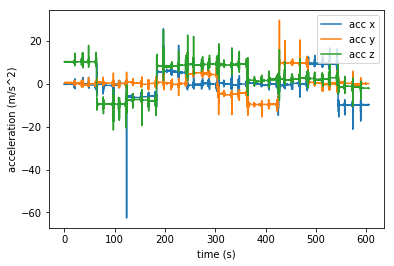

In [116]:
## Acceleration
std_acc = std[std[1]==' ACC_UN']

acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

acc_t = std_acc[0].values

plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


Text(0,0.5,u'angular velocity (rad/s)')

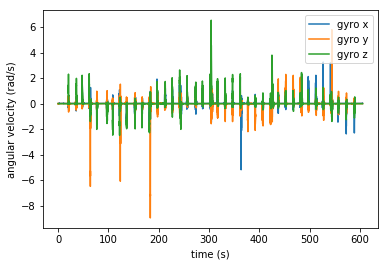

In [117]:
## Gyroscope
std_gyro = std[std[1]==' GYRO_UN']

gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

gyro_t = std_gyro[0].values

plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [118]:
#w_min = 0.3
w_max = 1.1

In [119]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))


In [120]:
std_static  = np.zeros(len(acc_t))

In [121]:
sio.savemat('24gTpos4.mat', {'resgT':gyro_t})

In [122]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 0.2 and std_gyro[i] < 0.1:
            std_static[i] = 1
            
    ##############
        i = i + 1

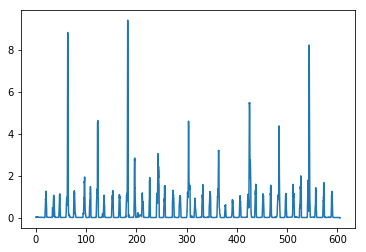

In [123]:
plt.plot(acc_t,std_acc)

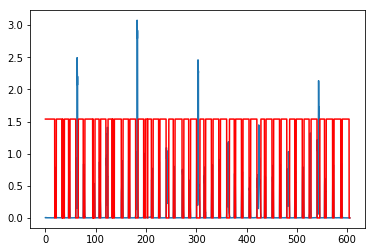

In [124]:
plt.plot(acc_t,std_gyro)
plt.plot(acc_t,0.5*std_static*np.max(std_gyro),'r')

Text(0.5,1,u'Detection on Acceleration')

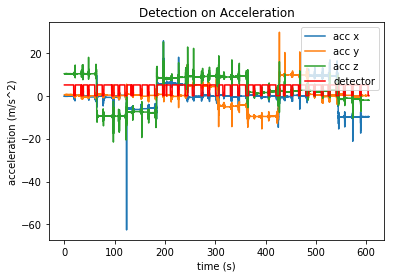

In [125]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,0.2*std_static*np.max(acc_z),'r')
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')


Text(0,0.5,u'angular velocity (rad/s)')

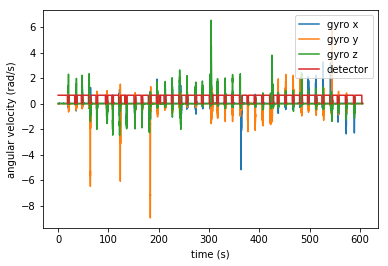

In [126]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,0.2*std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [127]:
windows = []

In [128]:
start = 0

In [129]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)



In [130]:
resT = np.zeros((len(windows)/2,3))

In [131]:
for i in range(len(resT)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resT[i,0] = gyro_t[windows[2*i]]
    resT[i,1] = gyro_t[windows[2*i+1]]

sio.savemat('24Tpos4.mat', {'resT':resT})
sio.savemat('24gTpos4.mat', {'resgT':gyro_t})

In [132]:
res = np.zeros((len(windows)/2,3))

In [133]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])


In [134]:
resGyro = np.zeros((len(windows)/2,3))

In [135]:
for i in range(len(resGyro)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resGyro[i,0] = np.mean(gyro_x[windows[2*i]:windows[2*i+1]])
    resGyro[i,1] = np.mean(gyro_y[windows[2*i]:windows[2*i+1]])
    resGyro[i,2] = np.mean(gyro_z[windows[2*i]:windows[2*i+1]])


In [136]:
import scipy.io as sio
sio.savemat('24Winpos4.mat', {'windows':windows})
sio.savemat('24Stpos4.mat',  {'res':res})
sio.savemat('24Gyrpos4.mat', {'resGyro':resGyro})

# 1. DataSet5

In [137]:
std = pd.read_csv('24pos11.csv', index_col = None, header = None)

std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

std.head(10)

time = std[0].values

Text(0,0.5,u'acceleration (m/s^2)')

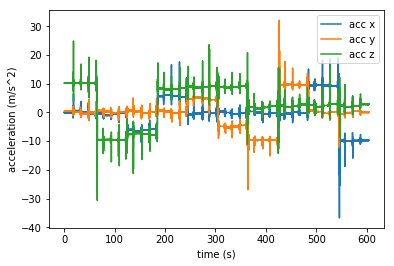

In [138]:
## Acceleration
std_acc = std[std[1]==' ACC_UN']

acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

acc_t = std_acc[0].values

plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


Text(0,0.5,u'angular velocity (rad/s)')

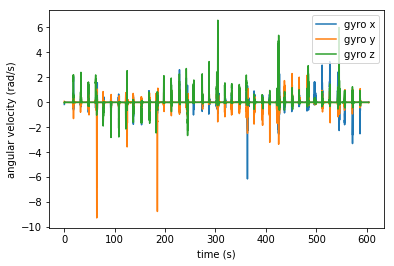

In [139]:
## Gyroscope
std_gyro = std[std[1]==' GYRO_UN']

gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

gyro_t = std_gyro[0].values

plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [140]:
## Stability Detection
g = np.sqrt(acc_x[14]**2 + acc_y[14]**2 + acc_z[14]**2)
g

10.16412607652982

In [141]:
w_min = 0.3
w_max = 1.1

In [142]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))


In [143]:
std_static  = np.zeros(len(acc_t))

In [144]:
sio.savemat('24gTpos5.mat', {'resgT':gyro_t})

In [145]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 0.2 and std_gyro[i] < 0.1:
            std_static[i] = 1
            
    ##############
        i = i + 1

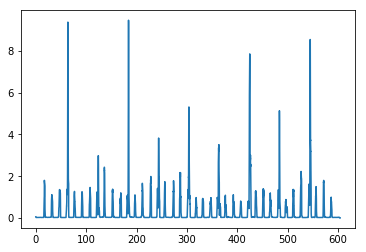

In [146]:
plt.plot(acc_t,std_acc)

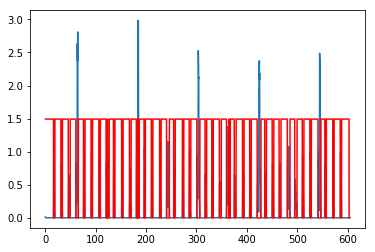

In [147]:
plt.plot(acc_t,std_gyro)
plt.plot(acc_t,0.5*std_static*np.max(std_gyro),'r')

Text(0.5,1,u'Detection on Acceleration')

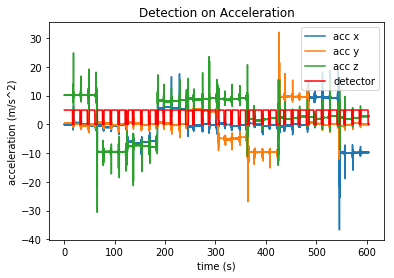

In [148]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,0.2*std_static*np.max(acc_z),'r')
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')


Text(0,0.5,u'angular velocity (rad/s)')

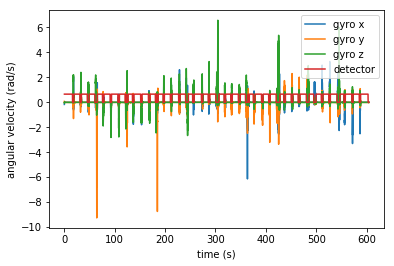

In [149]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,0.2*std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [150]:
windows = []

In [151]:
start = 0

In [152]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)



In [157]:
resT = np.zeros((len(windows)/2,3))

In [158]:
for i in range(len(resT)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resT[i,0] = gyro_t[windows[2*i]]
    resT[i,1] = gyro_t[windows[2*i+1]]

sio.savemat('24Tpos5.mat', {'resT':resT})
sio.savemat('24gTpos5.mat', {'resgT':gyro_t})

In [159]:
res = np.zeros((len(windows)/2,3))

In [160]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])


In [161]:
resGyro = np.zeros((len(windows)/2,3))

In [162]:
for i in range(len(resGyro)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resGyro[i,0] = np.mean(gyro_x[windows[2*i]:windows[2*i+1]])
    resGyro[i,1] = np.mean(gyro_y[windows[2*i]:windows[2*i+1]])
    resGyro[i,2] = np.mean(gyro_z[windows[2*i]:windows[2*i+1]])


In [163]:
import scipy.io as sio
sio.savemat('24Winpos5.mat', {'windows':windows})
sio.savemat('24Stpos5.mat',  {'res':res})
sio.savemat('24Gyrpos5.mat', {'resGyro':resGyro})

# 1. DataSet 6

In [164]:
std = pd.read_csv('24pos12.csv', index_col = None, header = None)

std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

std.head(10)

time = std[0].values

Text(0,0.5,u'acceleration (m/s^2)')

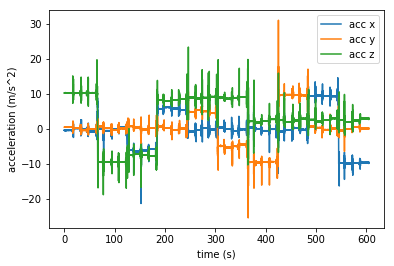

In [165]:
## Acceleration
std_acc = std[std[1]==' ACC_UN']

acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

acc_t = std_acc[0].values

plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


Text(0,0.5,u'angular velocity (rad/s)')

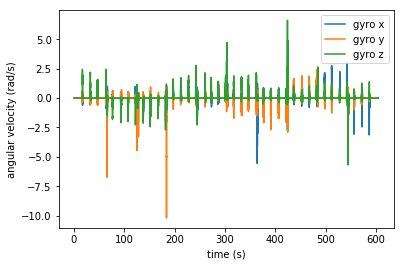

In [166]:
## Gyroscope
std_gyro = std[std[1]==' GYRO_UN']

gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

gyro_t = std_gyro[0].values

plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [167]:
## Stability Detection
g = np.sqrt(acc_x[14]**2 + acc_y[14]**2 + acc_z[14]**2)
g

10.214913988443858

In [168]:
w_min = 0.3
w_max = 1.1

In [169]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))


In [170]:
std_static  = np.zeros(len(acc_t))

In [171]:
sio.savemat('24gTpos6.mat', {'resgT':gyro_t})

In [172]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 0.2 and std_gyro[i] < 0.1:
            std_static[i] = 1
            
    ##############
        i = i + 1

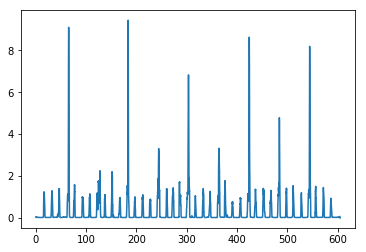

In [173]:
plt.plot(acc_t,std_acc)

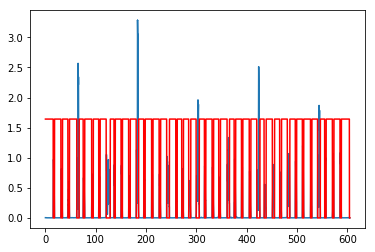

In [174]:
plt.plot(acc_t,std_gyro)
plt.plot(acc_t,0.5*std_static*np.max(std_gyro),'r')

Text(0.5,1,u'Detection on Acceleration')

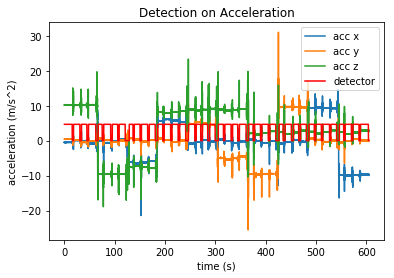

In [175]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,0.2*std_static*np.max(acc_z),'r')
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')


Text(0,0.5,u'angular velocity (rad/s)')

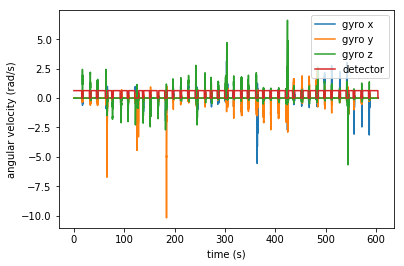

In [176]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,0.2*std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [177]:
windows = []

In [178]:
start = 0

In [179]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)



In [180]:
resT = np.zeros((len(windows)/2,3))

In [181]:
for i in range(len(resT)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resT[i,0] = gyro_t[windows[2*i]]
    resT[i,1] = gyro_t[windows[2*i+1]]

sio.savemat('24Tpos6.mat', {'resT':resT})
sio.savemat('24gTpos6.mat', {'resgT':gyro_t})

In [182]:
res = np.zeros((len(windows)/2,3))

In [183]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])


In [184]:
resGyro = np.zeros((len(windows)/2,3))

In [185]:
for i in range(len(resGyro)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resGyro[i,0] = np.mean(gyro_x[windows[2*i]:windows[2*i+1]])
    resGyro[i,1] = np.mean(gyro_y[windows[2*i]:windows[2*i+1]])
    resGyro[i,2] = np.mean(gyro_z[windows[2*i]:windows[2*i+1]])


In [186]:
import scipy.io as sio
sio.savemat('24Winpos6.mat', {'windows':windows})
sio.savemat('24Stpos6.mat',  {'res':res})
sio.savemat('24Gyrpos6.mat', {'resGyro':resGyro})

# 1. DataSet 7

In [187]:
std = pd.read_csv('24pos13.csv', index_col = None, header = None)

std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

std.head(10)

time = std[0].values

Text(0,0.5,u'acceleration (m/s^2)')

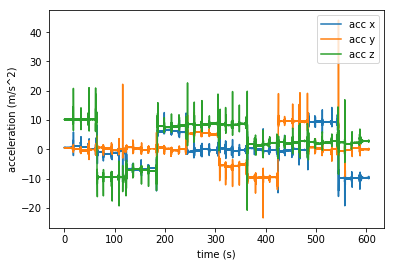

In [188]:
## Acceleration
std_acc = std[std[1]==' ACC_UN']

acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

acc_t = std_acc[0].values

plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


Text(0,0.5,u'angular velocity (rad/s)')

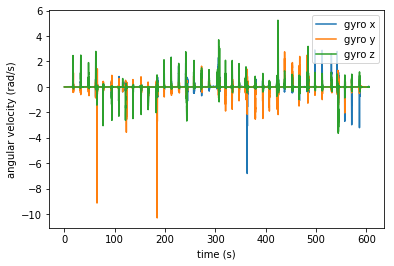

In [189]:
## Gyroscope
std_gyro = std[std[1]==' GYRO_UN']

gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

gyro_t = std_gyro[0].values

plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [190]:
sio.savemat('24gTpos7.mat', {'resgT':gyro_t})

In [191]:
## Stability Detection
g = np.sqrt(acc_x[14]**2 + acc_y[14]**2 + acc_z[14]**2)
g

10.172754837215514

In [192]:
w_min = 0.3
w_max = 1.1

In [193]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))


In [194]:
std_static  = np.zeros(len(acc_t))

In [195]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 0.2 and std_gyro[i] < 0.1:
            std_static[i] = 1
            
    ##############
        i = i + 1

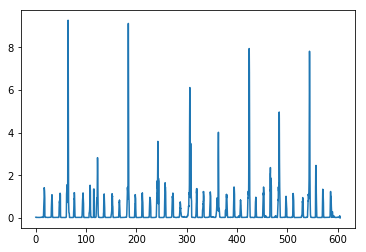

In [196]:
plt.plot(acc_t,std_acc)

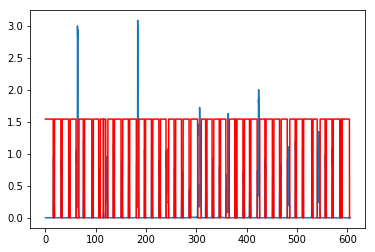

In [197]:
plt.plot(acc_t,std_gyro)
plt.plot(acc_t,0.5*std_static*np.max(std_gyro),'r')

Text(0.5,1,u'Detection on Acceleration')

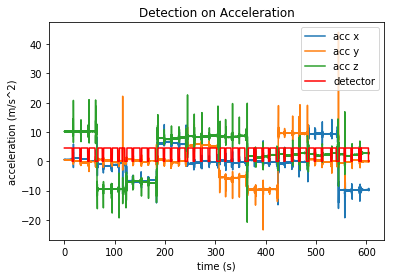

In [198]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,0.2*std_static*np.max(acc_z),'r')
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')


Text(0,0.5,u'angular velocity (rad/s)')

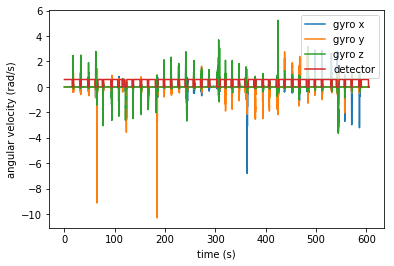

In [199]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,0.2*std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [200]:
windows = []

In [201]:
start = 0

In [202]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)



In [203]:
resT = np.zeros((len(windows)/2,3))

In [204]:
for i in range(len(resT)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resT[i,0] = gyro_t[windows[2*i]]
    resT[i,1] = gyro_t[windows[2*i+1]]

sio.savemat('24Tpos7.mat', {'resT':resT})
sio.savemat('24gTpos7.mat', {'resgT':gyro_t})

In [205]:
res = np.zeros((len(windows)/2,3))

In [206]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])


In [207]:
resGyro = np.zeros((len(windows)/2,3))

In [208]:
for i in range(len(resGyro)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resGyro[i,0] = np.mean(gyro_x[windows[2*i]:windows[2*i+1]])
    resGyro[i,1] = np.mean(gyro_y[windows[2*i]:windows[2*i+1]])
    resGyro[i,2] = np.mean(gyro_z[windows[2*i]:windows[2*i+1]])


In [209]:
import scipy.io as sio
sio.savemat('24Winpos7.mat', {'windows':windows})
sio.savemat('24Stpos7.mat',  {'res':res})
sio.savemat('24Gyrpos7.mat', {'resGyro':resGyro})

In [139]:
!pwd

/Users/Joanna/Desktop/Polaris/3d-tracking-at-gt-main/Calibration


In [210]:
hist = [0.0009717, 0.0075, 0.112, -0.0013, 0.0055, 0.0058]

In [211]:
np.mean(hist)

0.021745283333333337

Text(0,0.5,u'count')

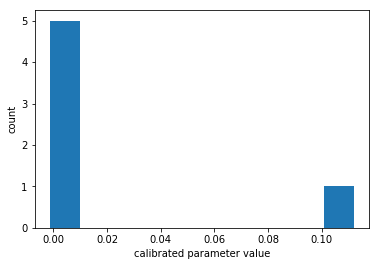

In [215]:
plt.hist(hist)
plt.xlabel('calibrated parameter value')
plt.ylabel('count')

In [213]:
from scipy import stats

z = np.abs(stats.zscore(hist))
print(z)

[0.51323759 0.3519477  2.22985665 0.5693628  0.40136022 0.39394834]


# 1. DataSet 8

In [225]:
std = pd.read_csv('24pos14.csv', index_col = None, header = None)

std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

std.head(10)

time = std[0].values

Text(0,0.5,u'acceleration (m/s^2)')

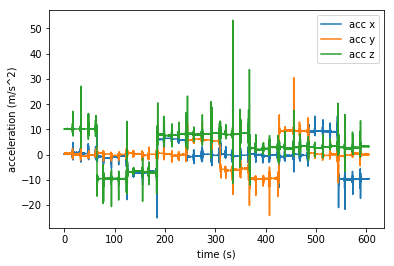

In [226]:
## Acceleration
std_acc = std[std[1]==' ACC_UN']

acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

acc_t = std_acc[0].values

plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')


Text(0,0.5,u'angular velocity (rad/s)')

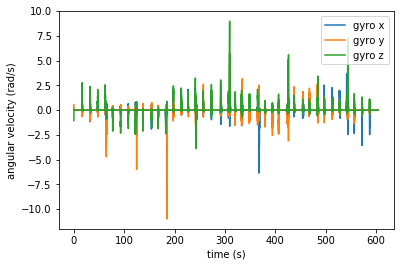

In [227]:
## Gyroscope
std_gyro = std[std[1]==' GYRO_UN']

gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

gyro_t = std_gyro[0].values

plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [228]:
sio.savemat('24gTpos7.mat', {'resgT':gyro_t})

In [229]:
## Stability Detection
g = np.sqrt(acc_x[14]**2 + acc_y[14]**2 + acc_z[14]**2)
g

10.17450401531495

In [230]:
w_min = 0.3
w_max = 1.1

In [231]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))


In [232]:
std_static  = np.zeros(len(acc_t))

In [233]:
i = 0
while(acc_t[i] + w_max < round(acc_t[-1])):
        
        # increase to max window size
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
        
        ## update parameters
        if std_acc[i] < 0.2 and std_gyro[i] < 0.1:
            std_static[i] = 1
            
    ##############
        i = i + 1

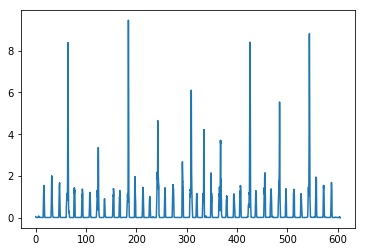

In [234]:
plt.plot(acc_t,std_acc)

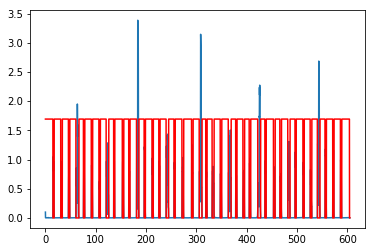

In [235]:
plt.plot(acc_t,std_gyro)
plt.plot(acc_t,0.5*std_static*np.max(std_gyro),'r')

Text(0.5,1,u'Detection on Acceleration')

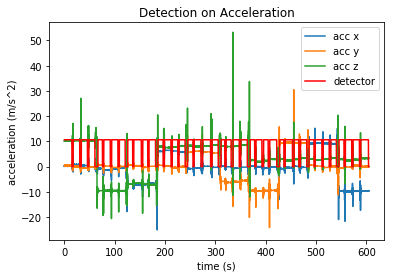

In [236]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,0.2*std_static*np.max(acc_z),'r')
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')


Text(0,0.5,u'angular velocity (rad/s)')

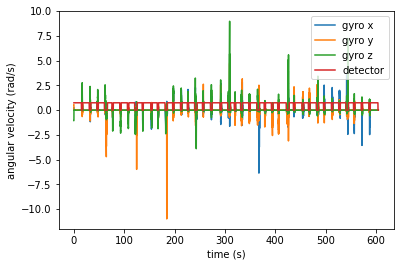

In [237]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,0.2*std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')


In [238]:
windows = []

In [239]:
start = 0

In [240]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)



In [241]:
resT = np.zeros((len(windows)/2,3))

In [242]:
for i in range(len(resT)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resT[i,0] = gyro_t[windows[2*i]]
    resT[i,1] = gyro_t[windows[2*i+1]]

sio.savemat('24Tpos8.mat', {'resT':resT})
sio.savemat('24gTpos8.mat', {'resgT':gyro_t})

In [243]:
res = np.zeros((len(windows)/2,3))

In [244]:
for i in range(len(res)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    res[i,0] = np.mean(acc_x[windows[2*i]:windows[2*i+1]])
    res[i,1] = np.mean(acc_y[windows[2*i]:windows[2*i+1]])
    res[i,2] = np.mean(acc_z[windows[2*i]:windows[2*i+1]])


In [245]:
resGyro = np.zeros((len(windows)/2,3))

In [246]:
for i in range(len(resGyro)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    resGyro[i,0] = np.mean(gyro_x[windows[2*i]:windows[2*i+1]])
    resGyro[i,1] = np.mean(gyro_y[windows[2*i]:windows[2*i+1]])
    resGyro[i,2] = np.mean(gyro_z[windows[2*i]:windows[2*i+1]])


In [247]:
import scipy.io as sio
sio.savemat('24Winpos8.mat', {'windows':windows})
sio.savemat('24Stpos8.mat',  {'res':res})
sio.savemat('24Gyrpos8.mat', {'resGyro':resGyro})